<a href="https://colab.research.google.com/github/SaketMunda/tensorflow-fundamentals/blob/master/01_neural_network_regression_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01. Neural Network Regression with TensorFlow

In this notebook, we're going to set the foundations for how you can take a sample of inputs(this is our data), build a neural network to discover patterns in those inputs and then make a prediction(in form of a number) based on those inputs.

## Typical Architecture of Regression Neural Network

The word *typical* is on purpose.

Why?

Because there are many different ways (actually, there's almost an infinite number of ways) to write neural network.

But the following is a generic setup for ingesting a collection of numbers, finding patterns in them and then outputing some kind of target number.


| **Hyperparameter** | **Typical value** |
| --- | --- |
| Input layer shape | Same shape as number of features (e.g. 3 for # bedrooms, # bathrooms, # car spaces in housing price prediction) |
| Hidden layer(s) | Problem specific, minimum = 1, maximum = unlimited |
| Neurons per hidden layer | Problem specific, generally 10 to 100 |
| Output layer shape | Same shape as desired prediction shape (e.g. 1 for house price) |
| Hidden activation | Usually [ReLU](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning) (rectified linear unit) |
| Output activation | None, ReLU, logistic/tanh |
| Loss function | [MSE](https://en.wikipedia.org/wiki/Mean_squared_error) (mean square error) or [MAE](https://en.wikipedia.org/wiki/Mean_absolute_error) (mean absolute error)/Huber (combination of MAE/MSE) if outliers |
| Optimizer | [SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) (stochastic gradient descent), [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) |

***Table 1:*** *Typical architecture of a regression network.* ***Source:*** *Adapted from page 293 of [Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow Book by Aurélien Géron](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)*


> 🔑 **Note**: A **hyperparameter** in machine learning is something a data analyst or developer can set themselves, where as a **parameter** usually describes something a model learns on its own (a value not explicitly set by an analyst).

In [1]:
# Import the tensorFlow
import tensorflow as tf
print(tf.__version__)

2.9.2


## Creating data to view and fit

Since we're working on a regression problem (predicting a number), let's create some linear data (a straight line) to model.

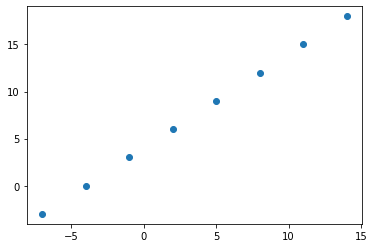

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([-3.0, 0.0, 3.0, 6.0, 9.0, 12.0, 15.0, 18.0])

# Visualise it
plt.scatter(X,y);

Before we do any modelling, can we calculate the pattern between X and y?

For example, say I asked you, based on this data what the y value would be if X was 17.0 ?

or how about if X was -10.0 ?

This kind of pattern discovery is the essence of what we'll be building neural networks to do for us.

## Regression input shapes and output shapes

One of the most important concepts when working with neural networks are the input and output shapes.

The **input shape** is the shape of your data that goes into the model.
The **output shape** is the shape of your data you want to come out of your model.

These will differ depending on the problem you're working on.

Neural networks accept numbers and output numbers. These numbers are typically represented as tensors(or arrays).

Before, we created data using Numpy arrays, but we could do the same with tensors.

In [5]:
# Example input and output shapes of a regression model
house_info = tf.constant(["bedroom","bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [6]:
house_info.shape, house_price.shape

(TensorShape([3]), TensorShape([1]))

It says input shape as 3, and output shape is 1


![example of input and output shapes for a housing price prediction problem](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/01-input-and-output-shapes-housing-prices.png)

*If we were working on building a machine learning algorithm for predicting housing prices, our inputs may be number of bedrooms, number of bathrooms and number of garages, giving you an input shape of 3 (3 different features). And since we are trying to predict the price of the house, our output shape would be 1.*

## Steps in modelling with TensorFlow

Now we know what data we have as well as the input and output shapes, let's see how we'd build a neural network to model it.

In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

1. **Creating a model**: piece together the layers of a neural network yourself (using Functional or Sequential API) or import a previously build model (known as transfer learning).
2. **Compiling a model**: defining how a model performance should be measured(loss/metrics) as well as defining how it should improve(optimizer)
3. **Fitting a model**: letting the model try to find patterns in the data(how does x get to y)


Let's see using the Keras Sequential API to build a model for our regression problem.

In [7]:
# set the random see
tf.random.set_seed(42)

# create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# compile the model

model.compile(loss= tf.keras.losses.mae, # Mean absolute error
              optimizer = tf.keras.optimizers.SGD(), # Stochastic gradient descent
              metrics = ["mae"])

# Fit the model
model.fit(tf.expand_dims(X, axis = -1), y, epochs = 5)

Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 5.5048 - mae: 5.5048
Epoch 2/5
1/1 [==============================] - 0s 7ms/step - loss: 5.3723 - mae: 5.3723
Epoch 3/5
1/1 [==============================] - 0s 7ms/step - loss: 5.2398 - mae: 5.2398
Epoch 4/5
1/1 [==============================] - 0s 6ms/step - loss: 5.1073 - mae: 5.1073
Epoch 5/5
1/1 [==============================] - 0s 6ms/step - loss: 4.9748 - mae: 4.9748


We've just trained a model to figure out the patterns between X and y


In [8]:
# Check out X and y
X, y

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.]),
 array([-3.,  0.,  3.,  6.,  9., 12., 15., 18.]))

What do you think the outcome should be if we passed our model an x value of 17.0 ?


In [9]:
# Make a prediction with the model
model.predict([17.0])

1/1 [==============================] - 0s 182ms/step


array([[12.716021]], dtype=float32)

In [11]:
12.71 + 4.97 # adding with our model's loss

17.68

It doesn't went well.. it should've output something close to 21.0

> 🤔 **What's Keras ?** : I thought we were working with TensorFLow but everytime we write TensorFlow code, `keras` comes after `tf` (e.g `tf.keras.layers.Dense()`) ?

Before TensorFlow 2.0+, Keras was an API designed to be able to build deep learning models with ease. Since TensorFlow 2.0+, its functionality has been tightly integrated withing the TensorFlow Library.

## Improving a model